# ***Task - 01***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
heart = pd.read_csv('heart.csv')

In [ ]:
wine = pd.read_csv('WineQT.csv')

In [ ]:
x1 = heart.drop("target", axis = 1)
y1= heart["target"]
x2 = wine.drop("quality", axis = 1)
y2= wine["quality"]

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=42)

In [ ]:
def train_and_evaluate(x_train, x_test, y_train, y_test, criterion, ccp_alpha = 0.0):
  model = DecisionTreeClassifier(criterion = criterion, ccp_alpha = ccp_alpha)
  model.fit(x_train, y_train)

  train_acc = accuracy_score(y_train, model.predict(x_train))
  test_acc = accuracy_score(y_test, model.predict(x_test))

  return train_acc, test_acc, model

In [ ]:
# Heart Dataset
heart_results = {}
heart_results["Gini_NoPrune"] = train_and_evaluate(X1_train, X1_test, y1_train, y1_test, "gini")
heart_results["Gini_Pruned"]  = train_and_evaluate(X1_train, X1_test, y1_train, y1_test, "gini", 0.015)
heart_results["Entropy_NoPrune"] = train_and_evaluate(X1_train, X1_test, y1_train, y1_test, "entropy")
heart_results["Entropy_Pruned"]  = train_and_evaluate(X1_train, X1_test, y1_train, y1_test, "entropy", 0.015)

# Wine Dataset
wine_results = {}
wine_results["Gini_NoPrune"] = train_and_evaluate(X2_train, X2_test, y2_train, y2_test, "gini")
wine_results["Gini_Pruned"]  = train_and_evaluate(X2_train, X2_test, y2_train, y2_test, "gini", 0.015)
wine_results["Entropy_NoPrune"] = train_and_evaluate(X2_train, X2_test, y2_train, y2_test, "entropy")
wine_results["Entropy_Pruned"]  = train_and_evaluate(X2_train, X2_test, y2_train, y2_test, "entropy", 0.015)


In [ ]:
print("Heart Disease Dataset Results:")
for k,v in heart_results.items():
    print(k, "-> Train Acc:", v[0], "Test Acc:", v[1])

print("\nWine Quality Dataset Results:")
for k,v in wine_results.items():
    print(k, "-> Train Acc:", v[0], "Test Acc:", v[1])


Heart Disease Dataset Results:
Gini_NoPrune -> Train Acc: 1.0 Test Acc: 0.9707792207792207
Gini_Pruned -> Train Acc: 0.8312412831241283 Test Acc: 0.7727272727272727
Entropy_NoPrune -> Train Acc: 1.0 Test Acc: 0.9805194805194806
Entropy_Pruned -> Train Acc: 0.9483960948396095 Test Acc: 0.9188311688311688

Wine Quality Dataset Results:
Gini_NoPrune -> Train Acc: 1.0 Test Acc: 0.5947521865889213
Gini_Pruned -> Train Acc: 0.55625 Test Acc: 0.5539358600583091
Entropy_NoPrune -> Train Acc: 1.0 Test Acc: 0.5889212827988338
Entropy_Pruned -> Train Acc: 0.6225 Test Acc: 0.577259475218659


In [ ]:
y2_pred = wine_results["Entropy_Pruned"][2].predict(X2_test)

comparison = pd.DataFrame({"Actual": y2_test, "Predicted": y2_pred})
print(comparison.head(20))

correct = (y2_test == y2_pred).sum()
wrong = (y2_test != y2_pred).sum()

print(f"Correctly Predicted: {correct} out of {len(y2_test)}")
print(f"Wrong Predictions: {wrong}")


      Actual  Predicted
158        5          5
1081       6          6
291        5          5
538        6          5
367        6          7
793        8          7
128        5          5
56         5          5
448        6          6
422        5          5
355        7          7
1134       6          6
774        6          5
777        6          6
1063       5          6
497        6          6
447        5          6
718        5          6
1012       5          5
622        6          7
Correctly Predicted: 198 out of 343
Wrong Predictions: 145


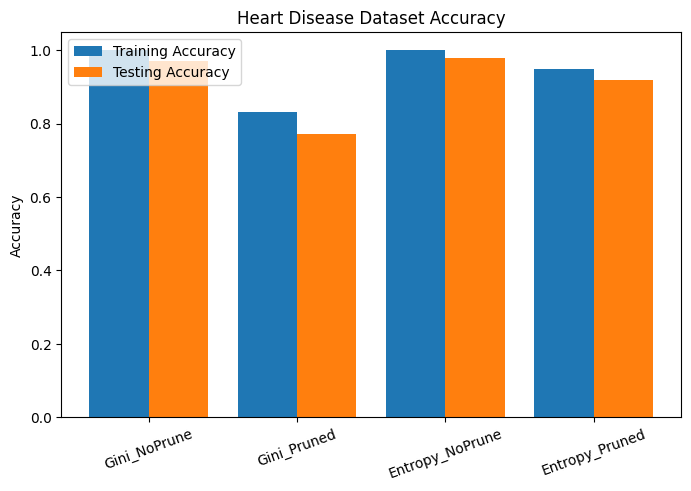

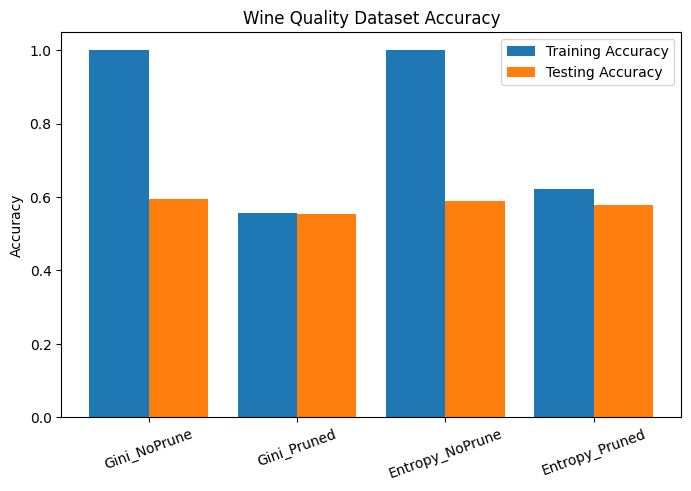

In [ ]:
def plot_results(results, title):
    train_acc = [v[0] for v in results.values()]
    test_acc = [v[1] for v in results.values()]
    labels = list(results.keys())

    x = range(len(labels))
    plt.figure(figsize=(8,5))
    plt.bar(x, train_acc, width=0.4, label="Training Accuracy", align='center')
    plt.bar([i+0.4 for i in x], test_acc, width=0.4, label="Testing Accuracy", align='center')
    plt.xticks([i+0.2 for i in x], labels, rotation=20)
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.legend()
    plt.show()

plot_results(heart_results, "Heart Disease Dataset Accuracy")
plot_results(wine_results, "Wine Quality Dataset Accuracy")


# ***TASK -02***

In [1]:
import pandas as pd
import math

In [2]:
data = {
    "AGE": ["Young","Young","Young","Young","Young","Middle","Middle","Middle","Middle","Middle",
            "Old","Old","Old","Old","Old"],
    "JOB_STATUS": [False,False,True,True,False,False,False,True,False,False,
                   False,False,True,True,False],
    "OWNS_HOUSE": [False,False,False,True,False,False,False,True,True,True,
                   True,True,False,False,False],
    "CREDIT_RATING": ["Fair","Good","Good","Fair","Fair","Fair","Good","Good","Excellent","Excellent",
                      "Excellent","Good","Good","Excellent","Fair"],
    "CLASS": ["No","No","Yes","Yes","No","No","No","Yes","Yes","Yes",
              "Yes","Yes","Yes","Yes","No"]
}

In [3]:
data = pd.DataFrame(data)

In [4]:
data.head()

,AGE,JOB_STATUS,OWNS_HOUSE,CREDIT_RATING,CLASS
0,Young,False,False,Fair,No
1,Young,False,False,Good,No
2,Young,True,False,Good,Yes
3,Young,True,True,Fair,Yes
4,Young,False,False,Fair,No


In [6]:
# entropy calculation function
def entropy(class_column):
  values = class_column.value_counts()
  total = len(class_column)
  ent = 0
  for count in values:
    p = count/total
    ent += -p*math.log2(p)
  return ent

In [7]:
def inormation_gain(data, attribute, target):
  total_entropy = entropy(data[target])
  values = data[attribute].unique()
  weighted_entropy = 0

  for v in values:
    subset = data[data[attribute] == v]
    weight = len(subset)/len(data)
    weighted_entropy += weight * entropy(data[attribute])

  IG = total_entropy - weighted_entropy
  return IG

In [8]:
x = data.drop("CLASS", axis = 1)
y = data["CLASS"]
features = x.columns
print(features)

Index(['AGE', 'JOB_STATUS', 'OWNS_HOUSE', 'CREDIT_RATING'], dtype='object')


In [15]:
igs = []
for feature in features:
  igs.append((feature, inormation_gain(data, feature, "CLASS")))

for feat, ig in igs:
  print(f"IG({feat}) = {ig:.4f}")
root_feat, root_ig = max(igs, key = lambda x:x[1])
print("\nHighest Information Gain:", root_ig)
print("Root Node:", root_feat)

IG(AGE) = -0.6140
IG(JOB_STATUS) = 0.0527
IG(OWNS_HOUSE) = 0.0000
IG(CREDIT_RATING) = -0.5946

Highest Information Gain: 0.052654760400179024
Root Node: JOB_STATUS


# ***TASK - 04***

In [16]:
import pandas as pd

In [17]:
data = {
    "Student": [1,2,3,4,5,6,7,8,9,10],
    "Prior_Experience": ["Yes","No","Yes","No","Yes","No","Yes","Yes","Yes","Yes"],
    "Course": ["Programming","Programming","History","Programming","English",
               "Programming","Programming","Mathematics","Programming","Programming"],
    "Time": ["Day","Day","Night","Night","Day","Day","Day","Night","Night","Night"],
    "Liked": ["Yes","No","No","Yes","Yes","No","No","Yes","Yes","No"]
}

In [18]:
df = pd.DataFrame(data)
df

,Student,Prior_Experience,Course,Time,Liked
0,1,Yes,Programming,Day,Yes
1,2,No,Programming,Day,No
2,3,Yes,History,Night,No
3,4,No,Programming,Night,Yes
4,5,Yes,English,Day,Yes
5,6,No,Programming,Day,No
6,7,Yes,Programming,Day,No
7,8,Yes,Mathematics,Night,Yes
8,9,Yes,Programming,Night,Yes
9,10,Yes,Programming,Night,No


In [21]:
x= df.drop("Liked", axis = 1)
y = df["Liked"]
features = x.columns
features

Index(['Student', 'Prior_Experience', 'Course', 'Time'], dtype='object')

In [36]:
# entropy calculation function
def entropy(class_column):
  values = class_column.value_counts()
  total = len(class_column)
  ent = 0
  for count in values:
    p = count/total
    ent += -p*math.log2(p)
  return ent

In [37]:
def inormation_gain(data, attribute, target):
  total_entropy = entropy(data[target])
  values = data[attribute].unique()
  weighted_entropy = 0

  for v in values:
    subset = data[data[attribute] == v]
    weight = len(subset)/len(data)
    weighted_entropy += weight * entropy(data[attribute])

  IG = total_entropy - weighted_entropy
  return IG

In [39]:
igs = []
for feature in features:
  igs.append((feature, inormation_gain(df, feature, "Liked")))

for feat, ig in igs:
  print(f"IG({feat}) = {ig:.4f}")
root_feat, root_ig = max(igs, key = lambda x:x[1])
print("\nHighest Information Gain:", root_ig)
print("Root Node:", root_feat)

IG(Prior_Experience) = 0.1187
IG(Course) = -0.3568
IG(Time) = 0.0000

Highest Information Gain: 0.11870910076930741
Root Node: Prior_Experience


# ***TASK - 03***

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter

In [58]:
data = pd.read_csv('cancer patient data sets.csv')
# x = data.drop("Level", axis = 1)
# y = data["Level"]
# print(x)
# print(y)

In [44]:
print(Counter(data["Level"]))
# the data looks balanced

Counter({'High': 365, 'Medium': 332, 'Low': 303})


In [48]:
# Check for duplicates
print("Duplicate Records:", data.duplicated().sum())

# Check for missing values
print("Missing Values per Column:\n", data.isnull().sum())

# Check categorical features
print(data.select_dtypes(include=['object']).columns)

Duplicate Records: 0
Missing Values per Column:
 index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64
Index(['Patient Id', 'Level'], dtype='object')


If the dataset is imbalanced (one class has far fewer samples), ML models may become biased. Techniques like SMOTE, undersampling, or oversampling can balance the dataset.

Empty values should be handled: either drop rows/columns (if very few) or impute values (mean/median for numeric, mode for categorical).

Duplicate records should be removed to avoid bias.

Categorical features must be encoded (One-Hot / Label Encoding) to make them machine-readable.

In [60]:
df = pd.get_dummies(data, columns = [ 'Level'], drop_first = True)
df = df.drop("Patient Id", axis = 1)

In [52]:
df

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level_Low,Level_Medium
0,0,33,1,2,4,5,4,3,2,2,...,4,2,2,3,1,2,3,4,True,False
1,1,17,1,3,1,5,3,4,2,2,...,3,7,8,6,2,1,7,2,False,True
2,2,35,1,4,5,6,5,5,4,6,...,7,9,2,1,4,6,7,2,False,False
3,3,37,1,7,7,7,7,6,7,7,...,2,3,1,4,5,6,7,5,False,False
4,4,46,1,6,8,7,7,7,6,7,...,2,4,1,4,2,4,2,3,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,44,1,6,7,7,7,7,6,7,...,3,2,7,8,2,4,5,3,False,False
996,996,37,2,6,8,7,7,7,6,7,...,6,5,7,2,4,3,1,4,False,False
997,997,25,2,4,5,6,5,5,4,6,...,7,9,2,1,4,6,7,2,False,False
998,998,18,2,6,8,7,7,7,6,7,...,2,4,1,4,2,4,2,3,False,False



The **Patient_ID** column is only an identifier and does not carry any medical information, so keeping or encoding it would mislead the model; that’s why it is safe to drop. On the other hand, the **Level** column (Low, Medium, High) is categorical and must be converted into numeric form for the model. While Label Encoding could be used if the order truly represented equal spacing, in this case it is safer to apply **dummy encoding** so the model does not assume false numeric relationships between the categories.


In [61]:
corr_matrix = df.corr(method='pearson')
corr_matrix

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level_Low,Level_Medium
index,1.000000,0.002674,-0.025739,0.053307,0.041374,0.037960,0.032355,0.030725,0.025177,0.030743,...,0.026393,0.027950,0.015078,0.005573,0.015706,0.045687,0.003793,-0.002957,-0.053425,0.004318
Age,0.002674,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,...,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700,-0.096786,0.084983
Gender,-0.025739,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,...,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618,0.142881,0.006652
Air Pollution,0.053307,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,...,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343,-0.402653,-0.314827
Alcohol use,0.041374,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,...,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694,-0.587038,-0.098031
Dust Allergy,0.037960,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,...,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844,-0.683626,0.098909
OccuPational Hazards,0.032355,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,...,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916,-0.575850,-0.041204
Genetic Risk,0.030725,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,...,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831,-0.572926,-0.095448
chronic Lung Disease,0.025177,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,...,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375,-0.459490,-0.158788
Balanced Diet,0.030743,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,...,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677,-0.460569,-0.323336


In [62]:
# Get correlation of features with Level_Low
corr_low = corr_matrix['Level_Low'].drop(['Level_Low','Level_Medium'])

# Get correlation of features with Level_Medium
corr_med = corr_matrix['Level_Medium'].drop(['Level_Low','Level_Medium'])

# Sort by absolute correlation
corr_low = corr_low.abs().sort_values(ascending=False)
corr_med = corr_med.abs().sort_values(ascending=False)

print("Features ranked by correlation with Level_Low:\n", corr_low)
print("\nFeatures ranked by correlation with Level_Medium:\n", corr_med)

# Select features above a threshold (e.g., 0.5)
selected_low = corr_low[corr_low > 0.5]
selected_med = corr_med[corr_med > 0.5]

print("\nSelected features for Level_Low:\n", selected_low)
print("\nSelected features for Level_Medium:\n", selected_med)

Features ranked by correlation with Level_Low:
 Dust Allergy                0.683626
Obesity                     0.638192
Alcohol use                 0.587038
OccuPational Hazards        0.575850
Genetic Risk                0.572926
Coughing of Blood           0.542739
Shortness of Breath         0.502783
Fatigue                     0.495018
Chest Pain                  0.463752
Balanced Diet               0.460569
chronic Lung Disease        0.459490
Passive Smoker              0.445525
Frequent Cold               0.421055
Weight Loss                 0.404594
Air Pollution               0.402653
Clubbing of Finger Nails    0.401744
Wheezing                    0.388558
Snoring                     0.350741
Dry Cough                   0.303725
Swallowing Difficulty       0.286752
Smoking                     0.244449
Gender                      0.142881
Age                         0.096786
index                       0.053425
Name: Level_Low, dtype: float64

Features ranked by correlation 

DT does not require scaling, so we skip it. Scaling is only needed for distance-based models.

In [75]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
x=x.drop('Patient Id', axis = 1)
# Fit and transform the features
df_scaled = scaler.fit_transform(x)

# Convert back to DataFrame and keep column names
df_scaled = pd.DataFrame(df_scaled, columns=x.columns)

# Check
print(df_scaled.head())

      index       Age    Gender  Air Pollution  Alcohol use  Dust Allergy  \
0 -1.730320 -0.347848 -0.819903      -0.906679    -0.214954     -0.083340   
1 -1.726856 -1.681238 -0.819903      -0.413919    -1.360357     -0.083340   
2 -1.723391 -0.181174 -0.819903       0.078842     0.166847      0.421751   
3 -1.719927 -0.014501 -0.819903       1.557123     0.930449      0.926842   
4 -1.716463  0.735531 -0.819903       1.064362     1.312250      0.926842   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0             -0.398718     -0.743202             -1.288162      -1.167040   
1             -0.873383     -0.272821             -1.288162      -1.167040   
2              0.075946      0.197560             -0.205673       0.706970   
3              1.025275      0.667941              1.418061       1.175473   
4              1.025275      1.138323              0.876816       1.175473   

   ...  Coughing of Blood   Fatigue  Weight Loss  Shortness of Breat

In [63]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=0)
print("Train size: ",x_train.shape[0])
print("Validation size: ",x_val.shape[0])
print("Test size: ",x_test.shape[0])

Train size:  560
Validation size:  240
Test size:  200


Validation set is used to tune hyperparameters (like max depth, min samples) before testing on unseen test data.

In [69]:
# Drop 'Patient ID' from features
x_train = x_train.drop("Patient Id", axis=1)
x_test = x_test.drop("Patient Id", axis=1)

dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)

y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 1.0
Testing Accuracy: 1.0
